In [1]:
%matplotlib inline


# Comparing Nearest Neighbors with and without Neighborhood Components Analysis


An example comparing nearest neighbors classification with and without
Neighborhood Components Analysis.

It will plot the class decision boundaries given by a Nearest Neighbors
classifier when using the Euclidean distance on the original features, versus
using the Euclidean distance after the transformation learned by Neighborhood
Components Analysis. The latter aims to find a linear transformation that
maximises the (stochastic) nearest neighbor classification accuracy on the
training set.

Adapted from https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html

Automatically created module for IPython interactive environment


/home/user/feldbauer/PycharmProjects/hubness/hubness/neighbors/base.py:458: UserWarning: n_candidates > n_samples. Setting n_candidates = n_samples.
  warnings.warn(f'n_candidates > n_samples. Setting n_candidates = n_samples.')
/home/user/feldbauer/PycharmProjects/hubness/hubness/neighbors/base.py:458: UserWarning: n_candidates > n_samples. Setting n_candidates = n_samples.
  warnings.warn(f'n_candidates > n_samples. Setting n_candidates = n_samples.')
/home/user/feldbauer/PycharmProjects/hubness/hubness/neighbors/base.py:458: UserWarning: n_candidates > n_samples. Setting n_candidates = n_samples.
  warnings.warn(f'n_candidates > n_samples. Setting n_candidates = n_samples.')
/home/user/feldbauer/PycharmProjects/hubness/hubness/neighbors/base.py:458: UserWarning: n_candidates > n_samples. Setting n_candidates = n_samples.
  warnings.warn(f'n_candidates > n_samples. Setting n_candidates = n_samples.')
/home/user/feldbauer/PycharmProjects/hubness/hubness/neighbors/base.py:458: UserWarn

ValueError: operands could not be broadcast together with shapes (45,45) (45,44) 

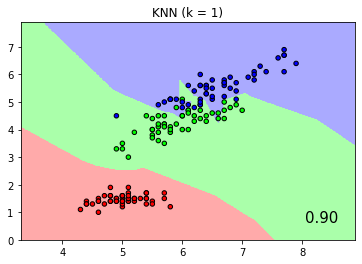

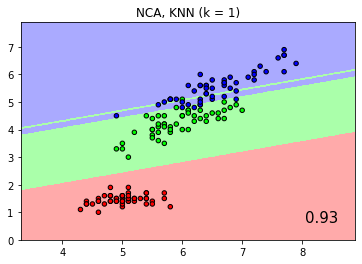

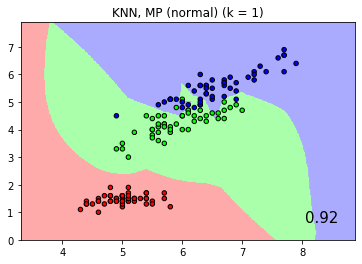

In [4]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from hubness.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)

print(__doc__)

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN',
         'NCA, KNN',
         'KNN, MP (normal)',
         'KNN, MP (empiric)',
         'KNN, LS (standard)',
         'KNN, LS (nicdm)',
        ]

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,
                                                      hubness='mutual_proximity',
                                                      hubness_params={'method': 'normal'}))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,
                                                      hubness='mutual_proximity',
                                                      hubness_params={'method': 'empiric'}))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,
                                                      hubness='local_scaling',
                                                      hubness_params={'method': 'standard'}))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors,
                                                      hubness='local_scaling',
                                                      hubness_params={'method': 'nicdm'}))
                         ]),
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()